In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16

In [2]:
path = r"C:\Users\IPSITA ROY BARMAN\Downloads/input/fashion-product-images-dataset/fashion-dataset/images'
images_df = pd.read_csv(r'C:\Users\IPSITA ROY BARMAN\Downloads\images.csv')
styles_df = pd.read_csv(r'C:\Users\IPSITA ROY BARMAN\Downloads\images.csv', on_bad_lines='skip')

In [3]:
images_df.head()

filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...

In [4]:
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [5]:
styles_df['filename'] = styles_df['id'].astype(str) + '.jpg'

In [6]:
styles_df

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName   filename  
0                     Turtle Check Men Navy Blue Shirt  15970.jpg  
1                   Peter England Men Party Blue Jeans  39386.jpg  
2                             Titan Women Silver Watch  59263.jpg  
3        Manchester United Men Solid Black Track Pants  21379.jpg  
4                                Puma Men Grey T-shirt  53759.jpg  
...                                                ...        ...  
44419                        Gas Men Caddy Casual Shoe  17036.jpg  
44420               Lotto Men's Soccer Track Flip Flop   6461.jpg  
44421             Puma Men Graphic Stellar Blue Tshirt  18842.jpg  
44422                   Rasasi Women Blue Lady Perfume  46694.jpg  
44423  Fossil Women Pink Dial Chronograph Watch ES3050  51623.jpg  

[44424 rows x 11 columns]

In [7]:
image_files = os.listdir(path)

In [8]:
styles_df['present'] = styles_df['filename'].apply(lambda x: x in image_files)

In [9]:
styles_df

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName   filename  present  
0                     Turtle Check Men Navy Blue Shirt  15970.jpg     True  
1                   Peter England Men Party Blue Jeans  39386.jpg     True  
2                             Titan Women Silver Watch  59263.jpg     True  
3        Manchester United Men Solid Black Track Pants  21379.jpg     True  
4                                Puma Men Grey T-shirt  53759.jpg     True  
...                                                ...        ...      ...  
44419                        Gas Men Caddy Casual Shoe  17036.jpg     True  
44420               Lotto Men's Soccer Track Flip Flop   6461.jpg     True  
44421             Puma Men Graphic Stellar Blue Tshirt  18842.jpg     True  
44422                   Rasasi Women Blue Lady Perfume  46694.jpg     True  
44423  Fossil Women Pink Dial Chronograph Watch ES3050  51623.jpg     True  

[44424 rows x 12 columns]

In [10]:
styles_df = styles_df[styles_df['present']].reset_index(drop=True)

In [11]:
styles_df = styles_df.sample(10000)

In [12]:
styles_df

id gender masterCategory subCategory articleType baseColour  season  \
5753   12849  Girls        Apparel       Dress     Dresses      White    Fall   
9975    8292    Men        Apparel     Topwear     Tshirts       Blue    Fall   
5205    2220    Men       Footwear      Sandal     Sandals      Black    Fall   
7637   21694  Women    Accessories     Watches     Watches      Brown  Winter   
21462  45845  Women        Apparel     Topwear      Kurtas      Green  Summer   
...      ...    ...            ...         ...         ...        ...     ...   
38819  38930  Girls        Apparel  Bottomwear       Jeans       Blue  Summer   
27022  48914  Women    Accessories   Jewellery     Pendant     Silver  Summer   
34614  45358  Women       Footwear       Shoes       Heels      Brown  Summer   
1713    5807  Women        Apparel     Topwear     Tshirts       Blue  Summer   
10335  27139  Women        Apparel   Innerwear         Bra      White  Summer   

         year   usage                            productDisplayName  \
5753   2011.0  Casual  Ant Kids Girls Butterfly Print White Dresses   
9975   2011.0  Casual               Mr.Men Men's Royal Blue T-shirt   
5205   2010.0  Sports                  Puma Men Carbon Black Sandal   
7637   2016.0  Casual          Fossil Women Brown Dial Watch ES2949   
21462  2012.0  Ethnic                     Vishudh Women Green Kurta   
...       ...     ...                                           ...   
38819  2012.0  Casual                Gini and Jony Girls Blue Jeans   
27022  2012.0  Casual        Lucera Women Silver Pendant with Chain   
34614  2016.0  Casual                  Cobblerz Women Brown Sandals   
1713   2011.0  Casual             ADIDAS Women's Tunic Blue T-shirt   
10335  2012.0  Casual                              Miss-T White Bra   

        filename  present  
5753   12849.jpg     True  
9975    8292.jpg     True  
5205    2220.jpg     True  
7637   21694.jpg     True  
21462  45845.jpg     True  
...          ...      ...  
38819  38930.jpg     True  
27022  48914.jpg     True  
34614  45358.jpg     True  
1713    5807.jpg     True  
10335  27139.jpg     True  

[10000 rows x 12 columns]

In [13]:
img_size = 224
datagen = ImageDataGenerator(rescale=1/255.) 
generator = datagen.flow_from_dataframe(dataframe=styles_df,
                                        directory=path,
                                        target_size=(img_size,img_size),
                                        x_col='filename',
                                        class_mode=None,
                                        batch_size=32,
                                        shuffle=False,
                                        classes=None)

Found 10000 validated image filenames.


In [14]:
base_model = VGG16(include_top=False, input_shape=(img_size,img_size,3))

for layer in base_model.layers:
    layer.trainable = False
    
input_layer = Input(shape=(img_size,img_size,3))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings = Model(inputs=input_layer, outputs=output)
embeddings.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
X = embeddings.predict(generator, verbose=1)

313/313 [==============================] - 434s 1s/step


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

In [18]:
styles_df[['pc1','pc2']] = X_pca

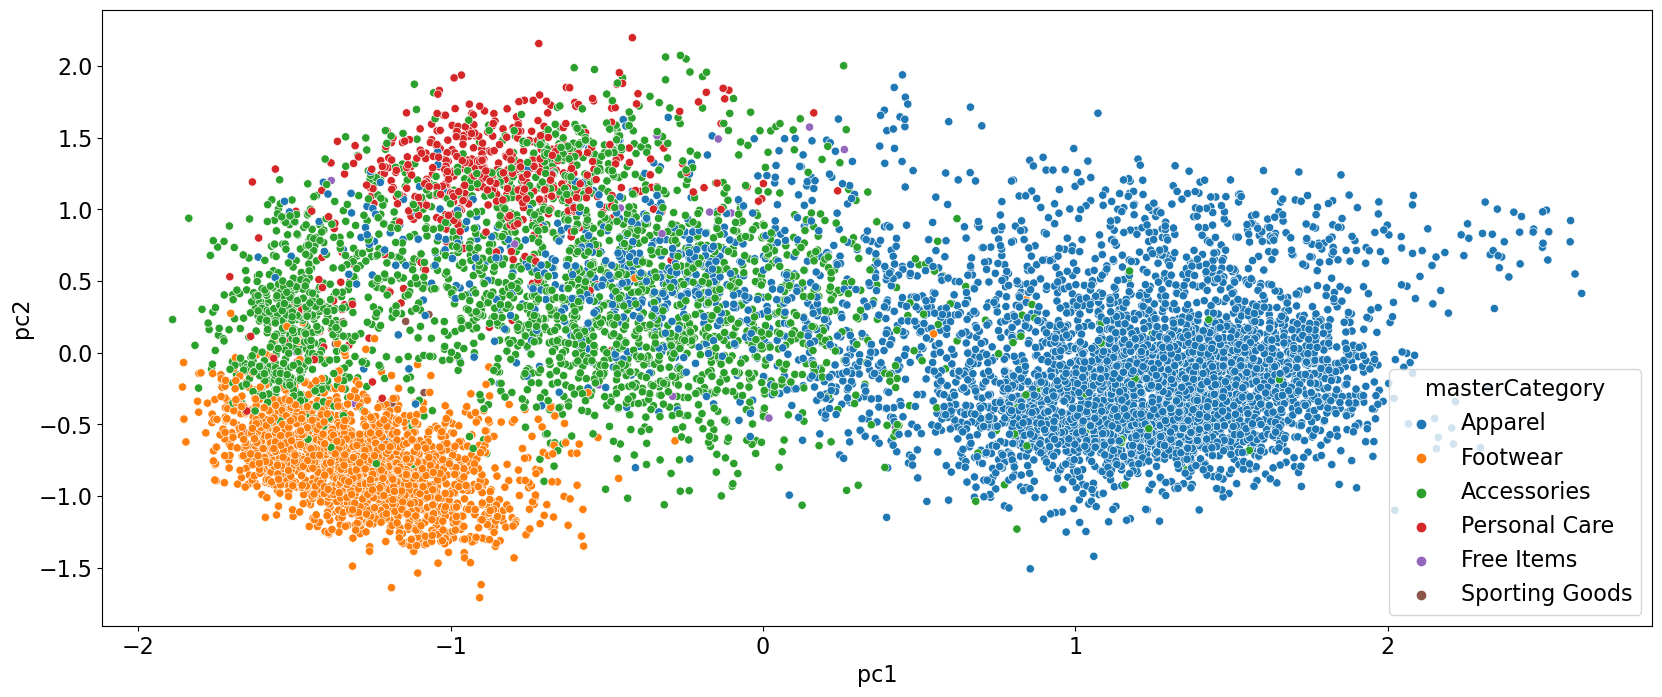

In [23]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='pc1',y='pc2', data=styles_df, hue='masterCategory')
plt.show()

In [24]:
def read_img(image_path):
    image = load_img(os.path.join(path,image_path),target_size=(img_size,img_size,3))
    image = img_to_array(image)
    image = image/255.
    return image

In [25]:
import random
from sklearn.neighbors import KNeighborsClassifier

In [26]:
y = styles_df['id']

In [29]:
nearest_neighbours = KNeighborsClassifier(n_neighbors=7)
nearest_neighbours.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [32]:
styles_df = styles_df.reset_index(drop=True)

In [34]:
X.shape

(10000, 512)

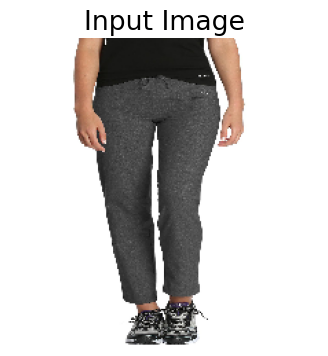

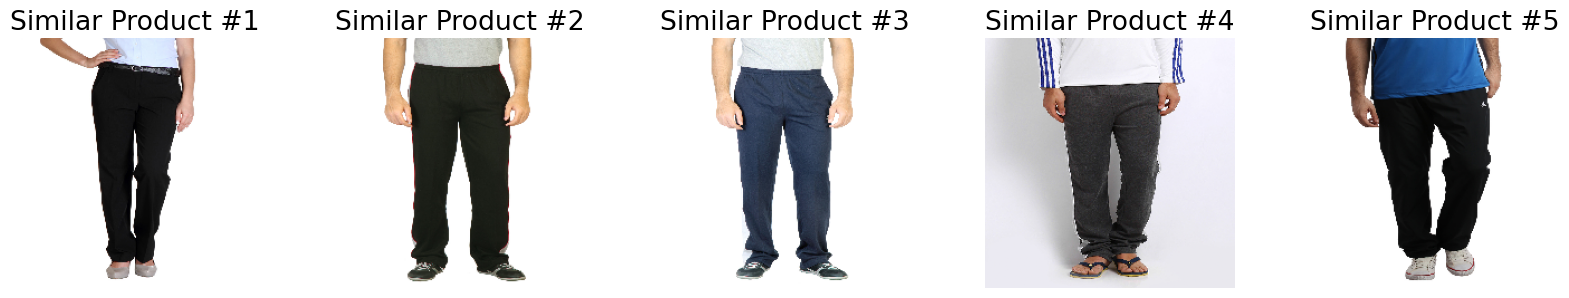

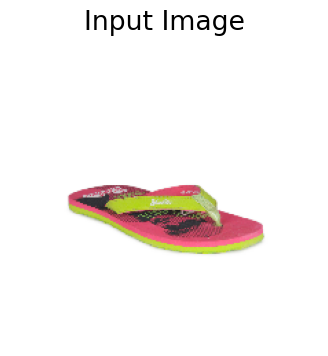

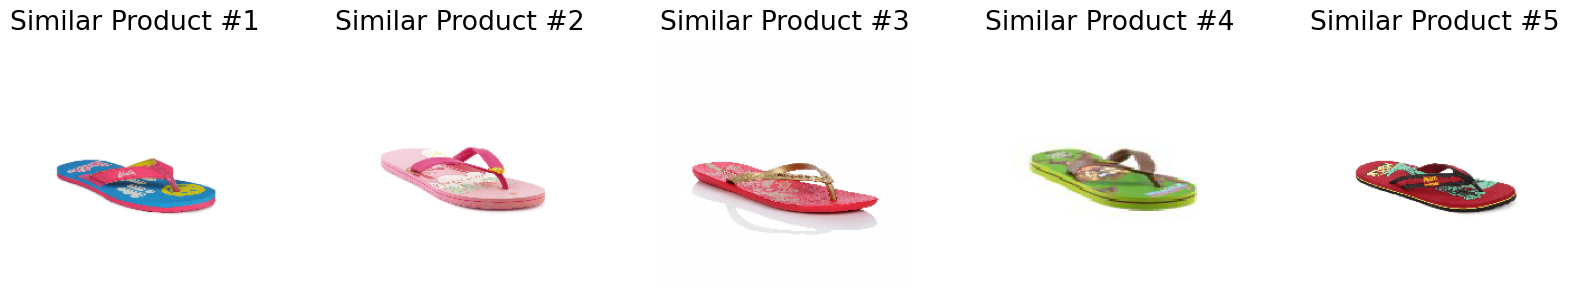

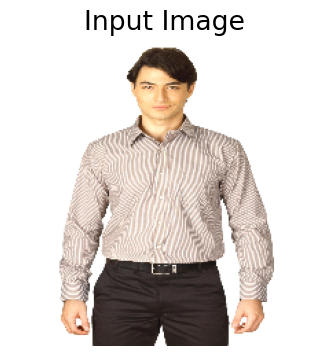

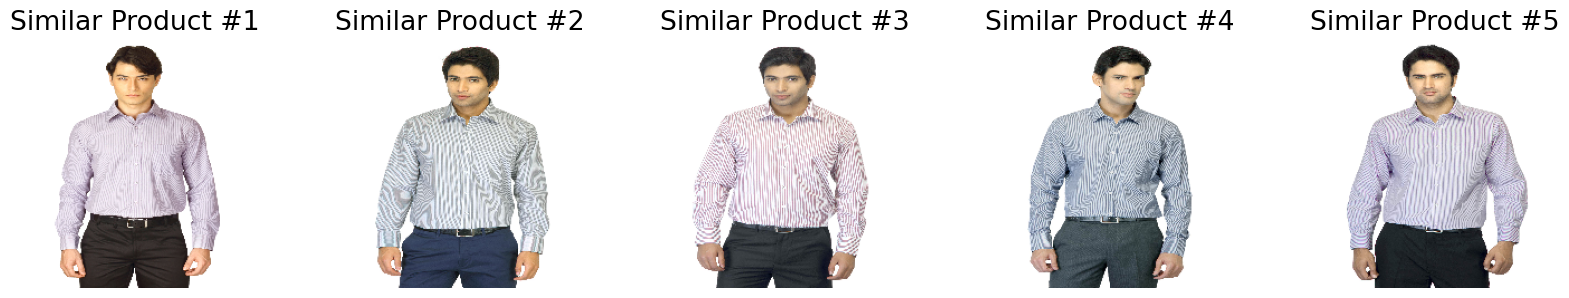

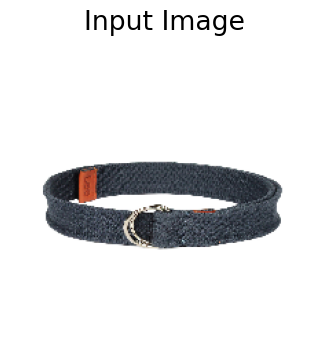

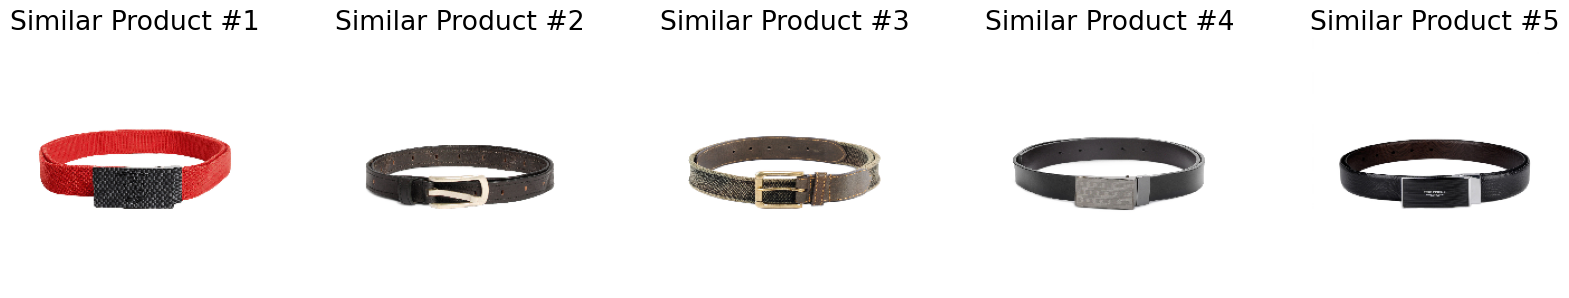

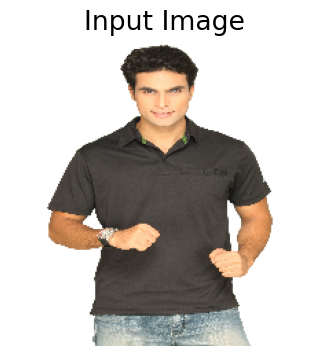

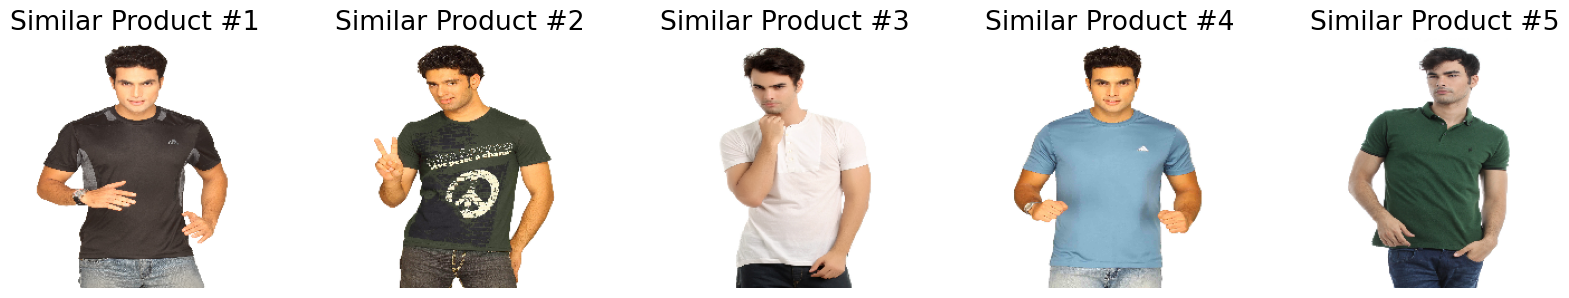

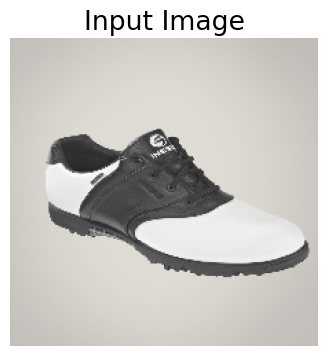

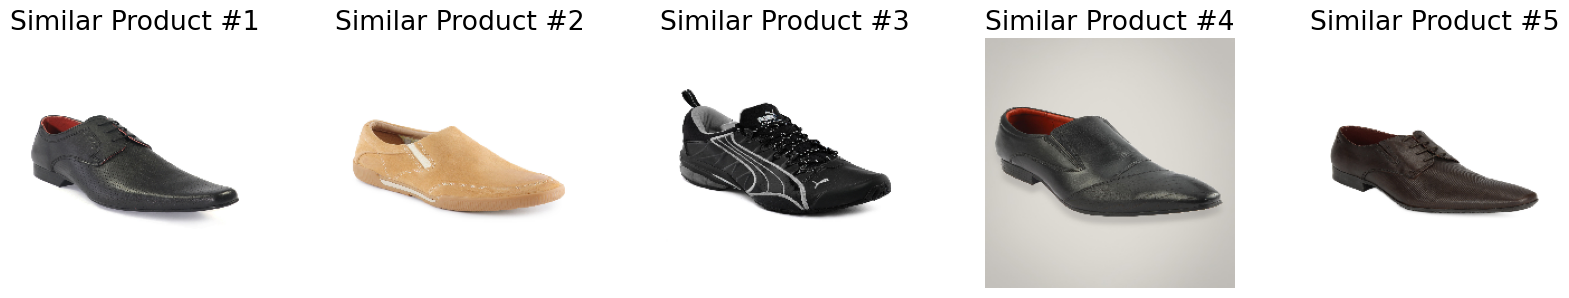

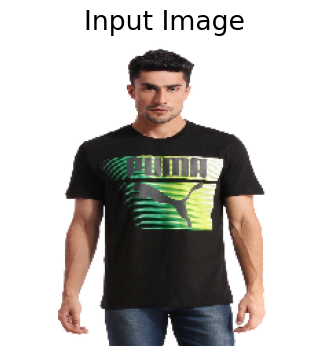

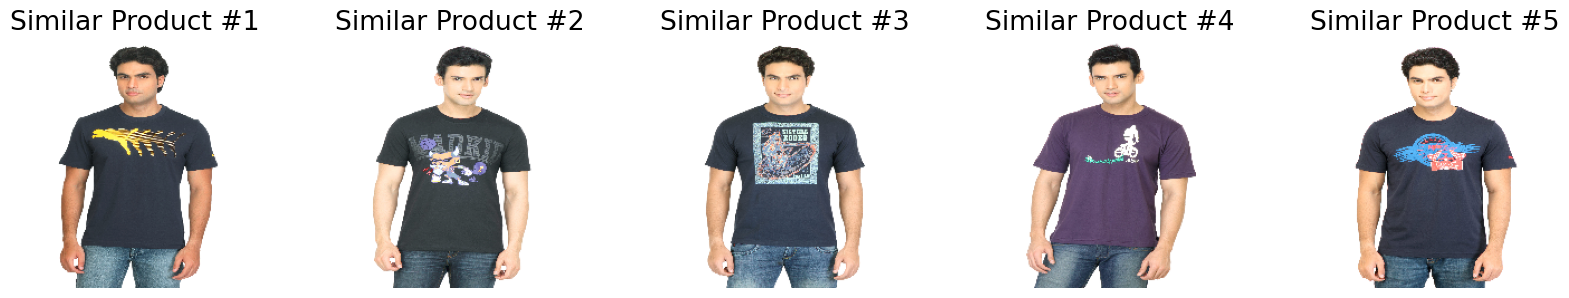

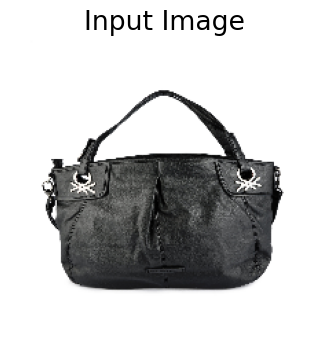

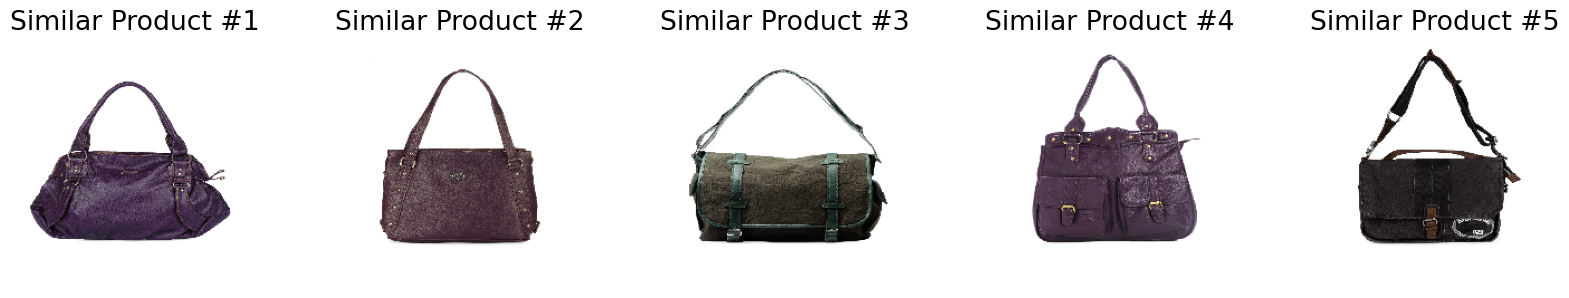

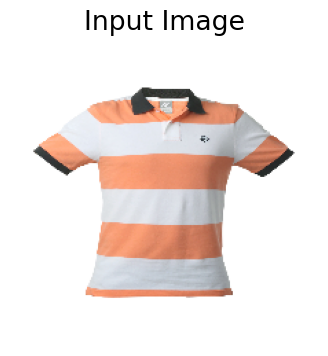

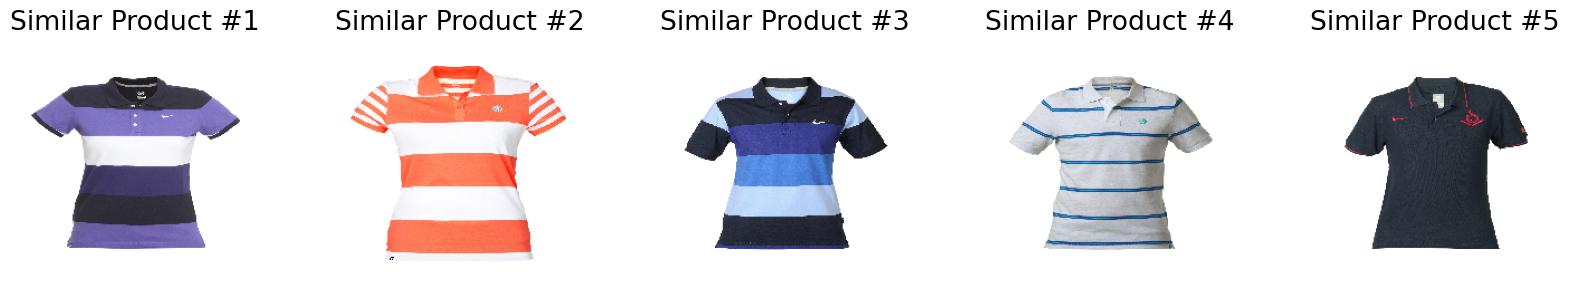

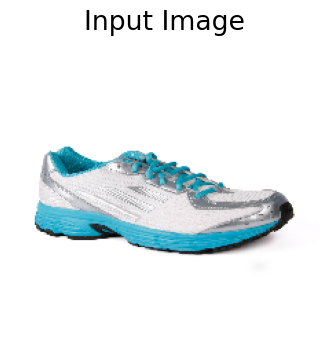

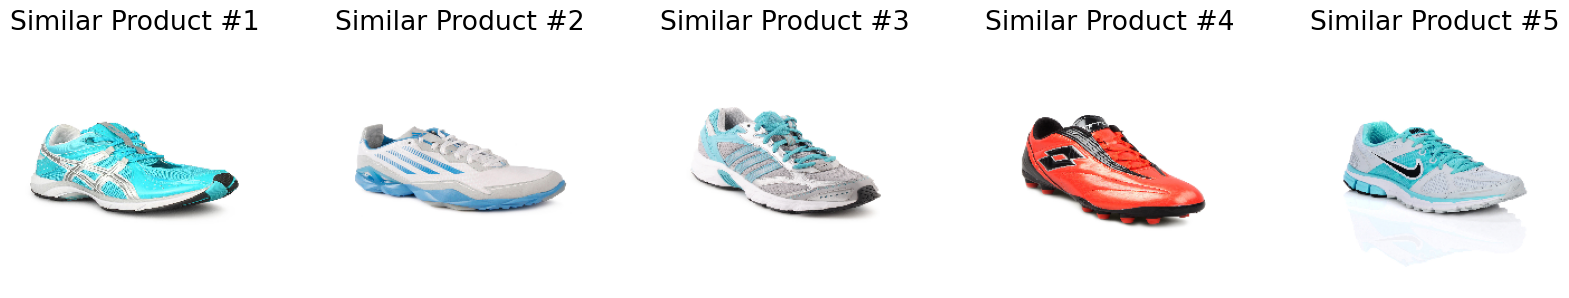

In [36]:
for _ in range(10):
    i = random.randint(0,len(styles_df))
    img1 = read_img(styles_df.loc[i,'filename'])
    dist, index = nearest_neighbours.kneighbors(X=X[i,:].reshape(1,-1))
    plt.figure(figsize = (4 , 4))
    plt.imshow(img1)
    plt.title("Input Image")
    plt.axis('off')
    
    plt.figure(figsize = (20 , 20))
    for i in range(1,6):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = read_img(styles_df.loc[index[0][i],'filename'])
        plt.imshow(image)
        plt.title(f'Similar Product #{i}')
        plt.axis('off')